# 🟦 多項式の和

* 引数 f, g
    * 係数の配列
    * 低次から高次の順（直感と逆なので注意）

In [33]:
def poly_add(f, g):
    """
    多項式の和 h(x) = f(x) + g(x)
    f, g は係数リスト（低次から高次の順）
    """
    n = len(f) - 1
    m = len(g) - 1
    c = []

    for i in range(min(n, m) + 1):
        c.append(f[i] + g[i])

    if n > m:
        c.extend(f[m + 1:])
    else:
        c.extend(g[n + 1:])

    return c


# テストパターン
patterns = [
    ([1, 2, 3], [3, 4, 5]),         # 同次数
    ([1, 2, 3, 4], [5, 6]),         # f(x)の方が次数が高い
    ([2, 4], [1, 3, 5, 7]),         # g(x)の方が次数が高い
    ([0, 0, 1], [0, 0, -1]),        # 打ち消し合う
    ([5], [10]),                     # 定数同士
    ([3, -2, -1, 1], [2,-3,1]),
]

for f, g in patterns:
    h = poly_add(f, g)
    print(f"f(x)={f}, g(x)={g} → h(x)={h}")


f(x)=[1, 2, 3], g(x)=[3, 4, 5] → h(x)=[4, 6, 8]
f(x)=[1, 2, 3, 4], g(x)=[5, 6] → h(x)=[6, 8, 3, 4]
f(x)=[2, 4], g(x)=[1, 3, 5, 7] → h(x)=[3, 7, 5, 7]
f(x)=[0, 0, 1], g(x)=[0, 0, -1] → h(x)=[0, 0, 0]
f(x)=[5], g(x)=[10] → h(x)=[15]
f(x)=[3, -2, -1, 1], g(x)=[2, -3, 1] → h(x)=[5, -5, 0, 1]


# 🟦 多項式の積

In [34]:
def poly_mul(f, g):
    """
    多項式の積 h(x) = f(x) * g(x)
    f, g は係数リスト（低次から高次の順）
    """
    n = len(f) - 1
    m = len(g) - 1
    c = [0] * (n + m + 1)

    for i in range(n + m + 1):
        s = 0
        for j in range(max(0, i - m), min(i, n) + 1):
            s += f[j] * g[i - j]
        c[i] = s
    return c


# テスト
patterns = [
    ([1, 2], [3, 4]),
    ([2, 0, 1], [1, 1]),
    ([1, -1], [1, 1]),
    ([3], [5, 6, 7]),
    ([0, 1], [0, 1]),
     ([3, -2, -1, 1], [2,-3,1]),
]

for f, g in patterns:
    h = poly_mul(f, g)
    print(f"f(x)={f}, g(x)={g} → h(x)={h}")


f(x)=[1, 2], g(x)=[3, 4] → h(x)=[3, 10, 8]
f(x)=[2, 0, 1], g(x)=[1, 1] → h(x)=[2, 2, 1, 1]
f(x)=[1, -1], g(x)=[1, 1] → h(x)=[1, 0, -1]
f(x)=[3], g(x)=[5, 6, 7] → h(x)=[15, 18, 21]
f(x)=[0, 1], g(x)=[0, 1] → h(x)=[0, 0, 1]
f(x)=[3, -2, -1, 1], g(x)=[2, -3, 1] → h(x)=[6, -13, 7, 3, -4, 1]


## 🟠 ステップ毎に可視化

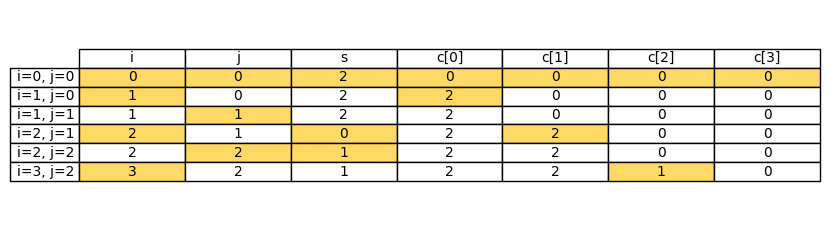

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

def poly_mul_trace(f, g):
    n = len(f) - 1
    m = len(g) - 1
    c = [0] * (n + m + 1)
    steps = []

    for i in range(n + m + 1):
        s = 0
        for j in range(max(0, i - m), min(i, n) + 1):
            s += f[j] * g[i - j]
            steps.append({
                "step": f"i={i}, j={j}",
                "i": i,
                "j": j,
                "f[j]": f[j],
                "g[i-j]": g[i - j],
                "s": s,
                "c": copy.deepcopy(c)
            })
        c[i] = s

    return c, steps


def visualize_trace(steps):
    df_list = []
    for st in steps:
        row = {"step": st["step"], "i": st["i"], "j": st["j"], "s": st["s"]}
        row.update({f"c[{k}]": v for k, v in enumerate(st["c"])})
        df_list.append(row)

    df = pd.DataFrame(df_list)
    df = df.set_index("step")

    # 差分を検出
    diff_mask = df.ne(df.shift())

    fig, ax = plt.subplots(figsize=(len(df.columns) * 1.2, len(df) * 0.4))
    ax.axis('off')

    table = ax.table(
        cellText=df.values.astype(str),
        rowLabels=df.index,
        colLabels=df.columns,
        loc='center',
        cellLoc='center'
    )

    # 差分セルを強調
    for (i, j), value in np.ndenumerate(diff_mask.values):
        if value:
            table[(i + 1, j)].set_facecolor('#ffd966')  # 強調色（黄色）

    plt.tight_layout()
    plt.show()



# テスト
patterns = [
    ([2, 0, 1], [1, 1]),
]

for f, g in patterns:
    c, steps = poly_mul_trace(f, g)
    visualize_trace(steps)

| 変数                    | 意味                                                |
| --------------------- | ------------------------------------------------- |
| `f`, `g`              | 多項式の係数リスト（低次から高次の順）                               |
| `n`                   | 多項式 `f` の次数（= `len(f) - 1`）                       |
| `m`                   | 多項式 `g` の次数（= `len(g) - 1`）                       |
| `c`                   | 積多項式 `h(x) = f(x) * g(x)` の係数リスト（計算途中を保持）         |
| `steps`               | 各ステップごとの変数状態を記録するリスト                              |
| `i`                   | 外側ループのインデックス。結果係数 `c[i]` を計算中の位置を表す               |
| `j`                   | 内側ループのインデックス。`f[j] * g[i - j]` の計算で使用             |
| `s`                   | 各ステップでの部分和。`c[i]` の途中経過を保持                        |
| `steps.append({...})` | その時点の `i`, `j`, `f[j]`, `g[i-j]`, `s`, `c` の状態を記録 |
| `c[i] = s`            | `c[i]` に最終的な部分和 `s` を代入                           |


# 🟦 多項式の商

In [35]:
def poly_div(f, g):
    """
    多項式の割り算 f(x) = q(x)g(x) + r(x)
    f, g は係数リスト（低次から高次の順）
    出力: (q, r)
    """
    m = len(f) - 1
    n = len(g) - 1
    a = f[:]
    b = g[:]
    q = [0] * (m - n + 1)

    # 商の計算
    for k in range(m - n, -1, -1):
        s = 0
        for j in range(min(m - n - k, n)):
            s += q[k + 1 + j] * b[n - 1 - j]
        q[k] = (a[n + k] - s) / b[n]

    # 余りの計算
    r = [0] * n
    for k in range(n):
        s = 0
        for j in range(min(k, m - n) + 1):
            s += q[j] * b[k - j]
        r[k] = a[k] - s

    return q, r


# ==== テストパターン ====
patterns = [
    # f(x) = 2x^3 + 3x^2 + x + 5, g(x) = x^2 + 1
    ([5, 1, 3, 2], [1, 0, 1]),

    # f(x) = x^3 - 2x^2 + 4x - 8, g(x) = x - 2
    ([ -8, 4, -2, 1 ], [ -2, 1 ]),

    # f(x) = x^4 + 2x^3 + 3x^2 + 4x + 5, g(x) = x^2 + 1
    ([5, 4, 3, 2, 1], [1, 0, 1]),

    # f(x) = x^2 + 2x + 1, g(x) = x + 1
    ([1, 2, 1], [1, 1]),

    # f(x) = x^3 + 2x^2 + 3x + 4, g(x) = x^2 + x + 1
    ([4, 3, 2, 1], [1, 1, 1]),

     ([3, -2, -1, 1], [2,-3,1]),
]

for f, g in patterns:
    q, r = poly_div(f, g)
    print(f"f(x)={f}, g(x)={g}")
    print(f"  → q(x)={q}, r(x)={r}")
    print("-" * 40)


f(x)=[5, 1, 3, 2], g(x)=[1, 0, 1]
  → q(x)=[3.0, 2.0], r(x)=[2.0, -1.0]
----------------------------------------
f(x)=[-8, 4, -2, 1], g(x)=[-2, 1]
  → q(x)=[4.0, 0.0, 1.0], r(x)=[0.0]
----------------------------------------
f(x)=[5, 4, 3, 2, 1], g(x)=[1, 0, 1]
  → q(x)=[2.0, 2.0, 1.0], r(x)=[3.0, 2.0]
----------------------------------------
f(x)=[1, 2, 1], g(x)=[1, 1]
  → q(x)=[1.0, 1.0], r(x)=[0.0]
----------------------------------------
f(x)=[4, 3, 2, 1], g(x)=[1, 1, 1]
  → q(x)=[1.0, 1.0], r(x)=[3.0, 1.0]
----------------------------------------
f(x)=[3, -2, -1, 1], g(x)=[2, -3, 1]
  → q(x)=[2.0, 1.0], r(x)=[-1.0, 2.0]
----------------------------------------


## 🟠 ステップ毎に可視化

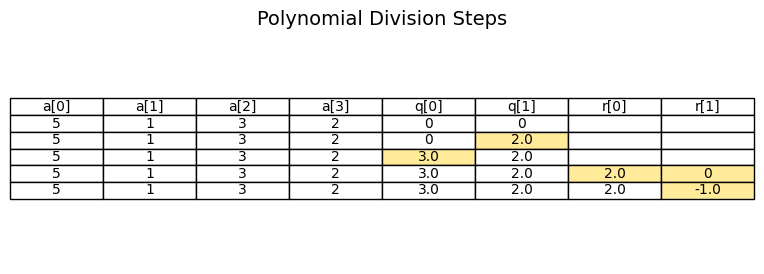

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import copy

def poly_div(f, g):
    m = len(f) - 1
    n = len(g) - 1
    a = f[:]
    b = g[:]
    q = [0] * (m - n + 1)

    states = []
    states.append({'step': 0, 'a': a[:], 'q': q[:], 'r': [None]*n})

    for k in range(m - n, -1, -1):
        s = 0
        for j in range(min(m - n - k, n)):
            s += q[k + 1 + j] * b[n - 1 - j]
        q[k] = (a[n + k] - s) / b[n]
        states.append({'step': len(states), 'a': a[:], 'q': q[:], 'r': [None]*n})

    r = [0] * n
    for k in range(n):
        s = 0
        for j in range(min(k, m - n) + 1):
            s += q[j] * b[k - j]
        r[k] = a[k] - s
        states.append({'step': len(states), 'a': a[:], 'q': q[:], 'r': r[:]})

    visualize_states(states)


def visualize_states(states):
    variables = list(states[0].keys())
    variables.remove('step')

    all_keys = []
    for var in variables:
        size = len(states[0][var])
        all_keys.extend([f"{var}[{i}]" for i in range(size)])

    data = []
    for st in states:
        row = []
        for var in variables:
            row.extend(st[var])
        data.append(row)

    data = np.array(data, dtype=object)

    fig, ax = plt.subplots(figsize=(len(all_keys)*1.2, len(states)*0.6))
    ax.axis('off')

    table = ax.table(cellText=data, colLabels=all_keys, loc='center', cellLoc='center')

    # 差分ハイライト
    for i in range(1, len(data)):
        for j in range(len(all_keys)):
            if data[i][j] != data[i-1][j]:
                table[(i+1, j)].set_facecolor('#ffeb99')  # 強調色

    plt.title("Polynomial Division Steps", fontsize=14)
    plt.show()


# 実行例
f = [5, 1, 3, 2]
g = [1, 0, 1]
poly_div(f, g)


| 変数名      | 意味                          | 型 / 内容                   |
| -------- | --------------------------- | ------------------------ |
| `f`      | 被除数（割られる多項式）の係数リスト（低次 → 高次） | `list[float]`            |
| `g`      | 除数（割る多項式）の係数リスト（低次 → 高次）    | `list[float]`            |
| `m`      | `f` の次数                     | `int`                    |
| `n`      | `g` の次数                     | `int`                    |
| `a`      | 被除数 `f` の作業用コピー             | `list[float]`            |
| `b`      | 除数 `g` の作業用コピー              | `list[float]`            |
| `q`      | 商多項式の係数リスト（低次 → 高次）         | `list[float]`            |
| `r`      | 余り多項式の係数リスト（低次 → 高次）        | `list[float]`            |
| `k`      | 商や余りを求める際のループインデックス         | `int`                    |
| `s`      | 各ステップでの部分和（中間計算）            | `float`                  |


# 🟦 ホーナー法
多項式の値を求める

$ α^k $ の計算を避けられる  
係数の配列は次数の低い順である点に注意する

In [1]:
def horner(f, alpha):
    """
    ホーナー法による多項式の値の計算
    f: 係数リスト（低次→高次）
    alpha: 評価する点
    """
    result = f[-1]  # a_n
    for k in range(len(f) - 2, -1, -1):  # n-1 から 0 まで
        result = result * alpha + f[k]
    return result


# テスト例
polynomials = [
    ([1, 2, 3], 2),       # f(x) = 1 + 2x + 3x^2,  α=2
    ([5, -4, 3, 2], 1),   # f(x) = 5 -4x + 3x^2 + 2x^3, α=1
    ([0, 0, 1], 5),       # f(x) = x^2, α=5
    ([2, 0, -1, 1], -2),  # f(x) = 2 - x^2 + x^3, α=-2
     ([3, -2, -1, 1], 2),
    ([1, -4, -8, -4, 1], 6),
]

for coeffs, alpha in polynomials:
    value = horner(coeffs, alpha)
    print(f"f(x)の係数={coeffs}, α={alpha} → f(α)={value}")


f(x)の係数=[1, 2, 3], α=2 → f(α)=17
f(x)の係数=[5, -4, 3, 2], α=1 → f(α)=6
f(x)の係数=[0, 0, 1], α=5 → f(α)=25
f(x)の係数=[2, 0, -1, 1], α=-2 → f(α)=-10
f(x)の係数=[3, -2, -1, 1], α=2 → f(α)=3
f(x)の係数=[1, -4, -8, -4, 1], α=6 → f(α)=121


# 🟦 導関数値の計算（拡張ホーナー法）
* 多項式の値と高階導関数の値を「同時に・効率的に」求められる
* 微分を計算せず、係数操作（再代入・加算・乗算）だけで導関数の値が得られます
    * 数値誤差も小さくなります
* 返り値betasは導関数の値を階乗 $ k! $ で割ったもの  
    * 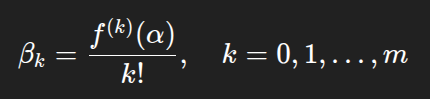
    * こうなっている理由はテイラー展開の時に使いやすいため


In [38]:
def poly_derivative_values(a, alpha, m):
    """
    Algorithm 6.5 多項式の高階導関数値の計算
    Input:
        a : 多項式 f(x) の係数リスト（低次から高次の順）
        alpha : 評価点 α
        m : 求める階数の最大値
    Output:
        betas[k] = f^(k)(α) / k!
    """
    n = len(a) - 1
    a = a.copy()
    betas = [0.0] * (m + 1)

    for k in range(m + 1):
        # j = n-1 から k まで後ろ向きに
        for j in range(n - 1, k - 1, -1):
            a[j] = a[j + 1] * alpha + a[j]
        # k が a の範囲外になる場合を防ぐ
        if k <= n:
            betas[k] = a[k]
        else:
            betas[k] = 0.0

    return betas


# テストパターン
patterns = [
    {"a": [4, 3, 2, 1], "alpha": 1, "m": 3},
    {"a": [-1, 5, -3, 0, 2], "alpha": 2, "m": 4},
    {"a": [3, 4, 5], "alpha": 0, "m": 2},
    {"a": [1, 1, 1, 1, 1, 1], "alpha": -1, "m": 5},
    {"a": [7], "alpha": 3, "m": 2},
    {"a": [3, -2, -1, 1], "alpha": 2, "m": 2},
]

for i, p in enumerate(patterns, 1):
    betas = poly_derivative_values(p["a"], p["alpha"], p["m"])
    print(f"【パターン{i}】")
    print(f"f(x) の係数 = {p['a']}")
    print(f"α = {p['alpha']}, m = {p['m']}")
    print(f"β_k = f^(k)(α)/k! = {betas}")
    print("-" * 50)


【パターン1】
f(x) の係数 = [4, 3, 2, 1]
α = 1, m = 3
β_k = f^(k)(α)/k! = [10, 10, 5, 1]
--------------------------------------------------
【パターン2】
f(x) の係数 = [-1, 5, -3, 0, 2]
α = 2, m = 4
β_k = f^(k)(α)/k! = [29, 57, 45, 16, 2]
--------------------------------------------------
【パターン3】
f(x) の係数 = [3, 4, 5]
α = 0, m = 2
β_k = f^(k)(α)/k! = [3, 4, 5]
--------------------------------------------------
【パターン4】
f(x) の係数 = [1, 1, 1, 1, 1, 1]
α = -1, m = 5
β_k = f^(k)(α)/k! = [0, 3, -6, 7, -4, 1]
--------------------------------------------------
【パターン5】
f(x) の係数 = [7]
α = 3, m = 2
β_k = f^(k)(α)/k! = [7, 0.0, 0.0]
--------------------------------------------------
【パターン6】
f(x) の係数 = [3, -2, -1, 1]
α = 2, m = 2
β_k = f^(k)(α)/k! = [3, 6, 5]
--------------------------------------------------


# 🟦 拡張ユークリッド算法（多項式版）

* 最大公約多項式（GCD）を求めるアルゴリズム
* 次のような線形関係の係数も求めます
    * $ A(x) \cdot f(x) + B(x) \cdot g(x) = \text{GCD}(f(x), g(x)) $
    * **Bézout 恒等式**（ベズー恒等式）と呼びます。
* 割り算を何回も繰り返すことで、GCD と A(x), B(x) を見つける
* 引数は **最高次から降順** だが、返り値は**低次からの昇順**なので注意



In [45]:
import numpy as np

def extended_euclidean_poly(f, g):
    """
    Algorithm 6.6 拡張ユークリッド算法 (多項式版)
    f(x), g(x) は多項式の係数リスト（最高次から降順）
    戻り値: gcd, A, B
    """
    f_list = [np.poly1d(f), np.poly1d(g)]
    A_list = [np.poly1d([1]), np.poly1d([0])]
    B_list = [np.poly1d([0]), np.poly1d([1])]

    k = 1
    while True:
        qk, fk1 = np.polydiv(f_list[k-1], f_list[k])
        f_list.append(fk1)

        Ak1 = -qk * A_list[k] + A_list[k-1]
        Bk1 = -qk * B_list[k] + B_list[k-1]
        A_list.append(Ak1)
        B_list.append(Bk1)

        if np.allclose(fk1, 0):
            break
        k += 1

    gcd = f_list[-2]  # 最後の非ゼロ多項式
    A = A_list[-2]
    B = B_list[-2]
    return gcd, A, B

def poly_to_str(p):
    return np.array2string(p.coeffs, separator=',', precision=2)


# ===== テストパターン =====
patterns = [
    ([1, -2, 1, -2], [1, 0, -1]),   # x^3 - 2x^2 + x - 2, x^2 - 1
    ([1, -1, -2, 2], [1, -3, 2])
]

for i, (f, g) in enumerate(patterns, 1):
    gcd, A, B = extended_euclidean_poly(f, g)
    print("-" * 20)
    print(f"f(x) = {poly_to_str(np.poly1d(f))}")
    print(f"g(x) = {poly_to_str(np.poly1d(g))}")
    print(f"→ gcd(f, g) = {poly_to_str(gcd)}")
    print(f"A(x) = {poly_to_str(A)}")
    print(f"B(x) = {poly_to_str(B)}")


--------------------
f(x) = [ 1,-2, 1,-2]
g(x) = [ 1, 0,-1]
→ gcd(f, g) = [3.]
A(x) = [-0.5,-1. ]
B(x) = [ 0.5, 0. ,-1. ]
--------------------
f(x) = [ 1,-1,-2, 2]
g(x) = [ 1,-3, 2]
→ gcd(f, g) = [ 2.,-2.]
A(x) = [1.]
B(x) = [-1.,-2.]


# 🟦 連分数展開に対応する有利式の計算

以下の値を求めるアルゴリズム  
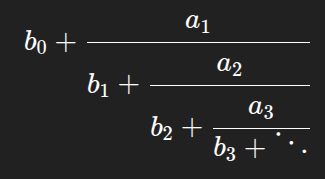


## 🔢 入力 (`a`, `b`)

1. `a`: リスト（長さ `n`）

   * 各要素は実数または整数
   * アルゴリズム中の ( a_1, a_2, ..., a_n ) に対応
   * 通常は連分数の「分子側の係数列」

2. `b`: リスト（長さ `n + 1`）

   * 各要素は実数または整数
   * アルゴリズム中の ( b_0, b_1, ..., b_n ) に対応
   * 通常は連分数の「分母側の係数列」

> ⚠️ **注意**: `len(b)` は必ず `len(a) + 1` でなければならない（そうでない場合は `AssertionError`）

## ✅ 出力 (`P`, `Q`)

出力は $ \frac{P}{Q} $ を表す

1. `P`: 整数または実数

   * 分子に対応する値
   * アルゴリズム終了時の ( P_n )

2. `Q`: 整数または実数

   * 分母に対応する値
   * アルゴリズム終了時の ( Q_n )



In [44]:
def compute_rational_from_continued_fraction(a, b):
    n = len(a)
    assert len(b) == n + 1, "b の長さは a の長さより1多くなければなりません"

    P_prev, P_curr = 1, b[0]
    Q_prev, Q_curr = 0, 1

    for k in range(n):
        ak1 = a[k]
        bk1 = b[k + 1]

        P_next = bk1 * P_curr + ak1 * P_prev
        Q_next = bk1 * Q_curr + ak1 * Q_prev

        P_prev, P_curr = P_curr, P_next
        Q_prev, Q_curr = Q_curr, Q_next

    return P_curr, Q_curr


# === 複数のテストケース ===
test_cases = [
    # ケース1: シンプルな入力
    {
        "a": [1, 2, 3],
        "b": [4, 5, 6, 7],
        "desc": "基本的なテストケース"
    },
    # ケース2: 全て1
    {
        "a": [1, 1, 1],
        "b": [1, 1, 1, 1],
        "desc": "すべての係数が1"
    },
    # ケース3: ゼロを含む
    {
        "a": [0, 1, 2],
        "b": [3, 0, 4, 5],
        "desc": "bに0を含むケース"
    },
    # ケース4: 負の係数
    {
        "a": [-1, -2, -3],
        "b": [2, -1, -2, -3],
        "desc": "すべての係数が負"
    },
    # ケース5: aの要素が大きい
    {
        "a": [10, 20, 30],
        "b": [1, 1, 1, 1],
        "desc": "aの係数が大きい"
    },
    {
        "a": [1, 1, 1, 1],
        "b": [1, 1, 1, 1, 1],
        "desc": ""
    },
]

# 実行と出力
for idx, case in enumerate(test_cases):
    a = case["a"]
    b = case["b"]
    desc = case["desc"]
    try:
        P, Q = compute_rational_from_continued_fraction(a, b)
        print(f"Case {idx + 1}: {desc}")
        print(f"  a = {a}")
        print(f"  b = {b}")
        print(f"  → P = {P}, Q = {Q}\n")
    except AssertionError as e:
        print(f"Case {idx + 1}: {desc} - エラー: {e}\n")


Case 1: 基本的なテストケース
  a = [1, 2, 3]
  b = [4, 5, 6, 7]
  → P = 1001, Q = 239

Case 2: すべての係数が1
  a = [1, 1, 1]
  b = [1, 1, 1, 1]
  → P = 5, Q = 3

Case 3: bに0を含むケース
  a = [0, 1, 2]
  b = [3, 0, 4, 5]
  → P = 15, Q = 5

Case 4: すべての係数が負
  a = [-1, -2, -3]
  b = [2, -1, -2, -3]
  → P = 3, Q = 3

Case 5: aの係数が大きい
  a = [10, 20, 30]
  b = [1, 1, 1, 1]
  → P = 361, Q = 51

Case 6: 
  a = [1, 1, 1, 1]
  b = [1, 1, 1, 1, 1]
  → P = 8, Q = 5

